## Load Libraries

In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from IPython.display import clear_output
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.test_env import TestEnv
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.algorithms.rl import RL

## Q-Learning

In [2]:
np.random.seed(3)
grid_size = generate_random_map(size=8, p=0.8)
black_color_code = '\033[30m'  # Black color for 'S'
blue_color_code = '\033[34m'   # Blue color for 'F'
red_color_code = '\033[91m'    # Red color for 'H'
green_color_code = '\033[92m'  # Green color for 'G'
reset_color_code = '\033[0m'   # Reset color to default
for row in grid_size:
    colored_row = ''  # Initialize an empty string to store the colored row
    # Iterate through each character in the row
    for char in row:
        # Check the character and add the corresponding color code
        if char == 'S':
            colored_row += black_color_code + char + reset_color_code + ' '  # Add 'S' in black color
        elif char == 'F':
            colored_row += blue_color_code + char + reset_color_code + ' '   # Add 'F' in blue color
        elif char == 'H':
            colored_row += red_color_code + char + reset_color_code + ' '    # Add 'H' in red color
        elif char == 'G':
            colored_row += green_color_code + char + reset_color_code + ' '  # Add 'G' in green color
        else:
            colored_row += char + ' '  # Add other characters with default color
    # Print the colored row
    print(colored_row)

S F F F H H F F 
F F F F F F F F 
F F F F F F F F 
F F F F F H H F 
H H F F F F F F 
F F F F F H F F 
F F F F F F F F 
F F F F F F F G 


In [ ]:
print(Q['gamma'][0.9].shape)

  7%|▋         | 6624/100000 [00:02<00:38, 2398.63it/s]/home/zsang/miniconda3/envs/cs7641/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 54.27 seconds


runtime = 56.39 seconds


runtime = 63.43 seconds


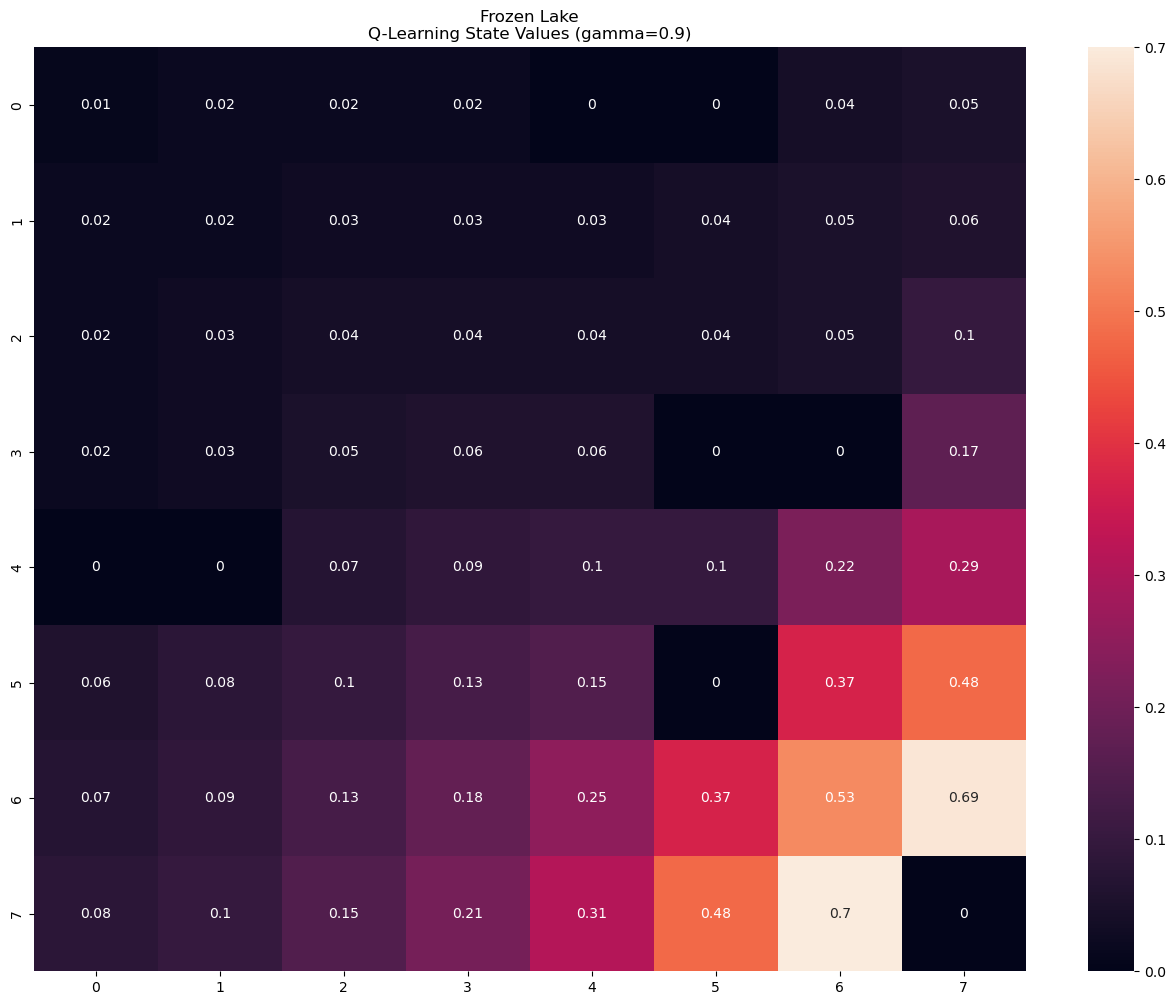

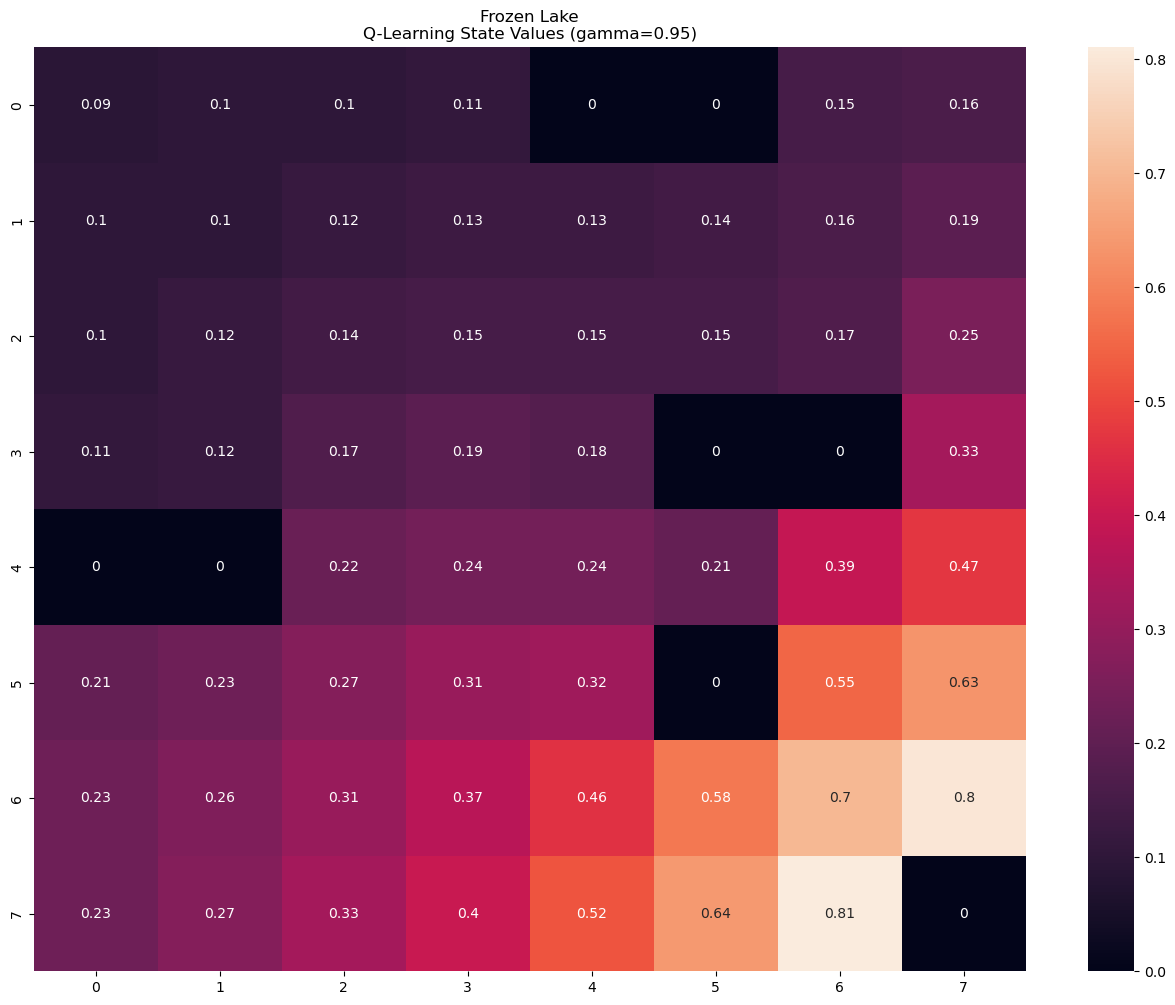

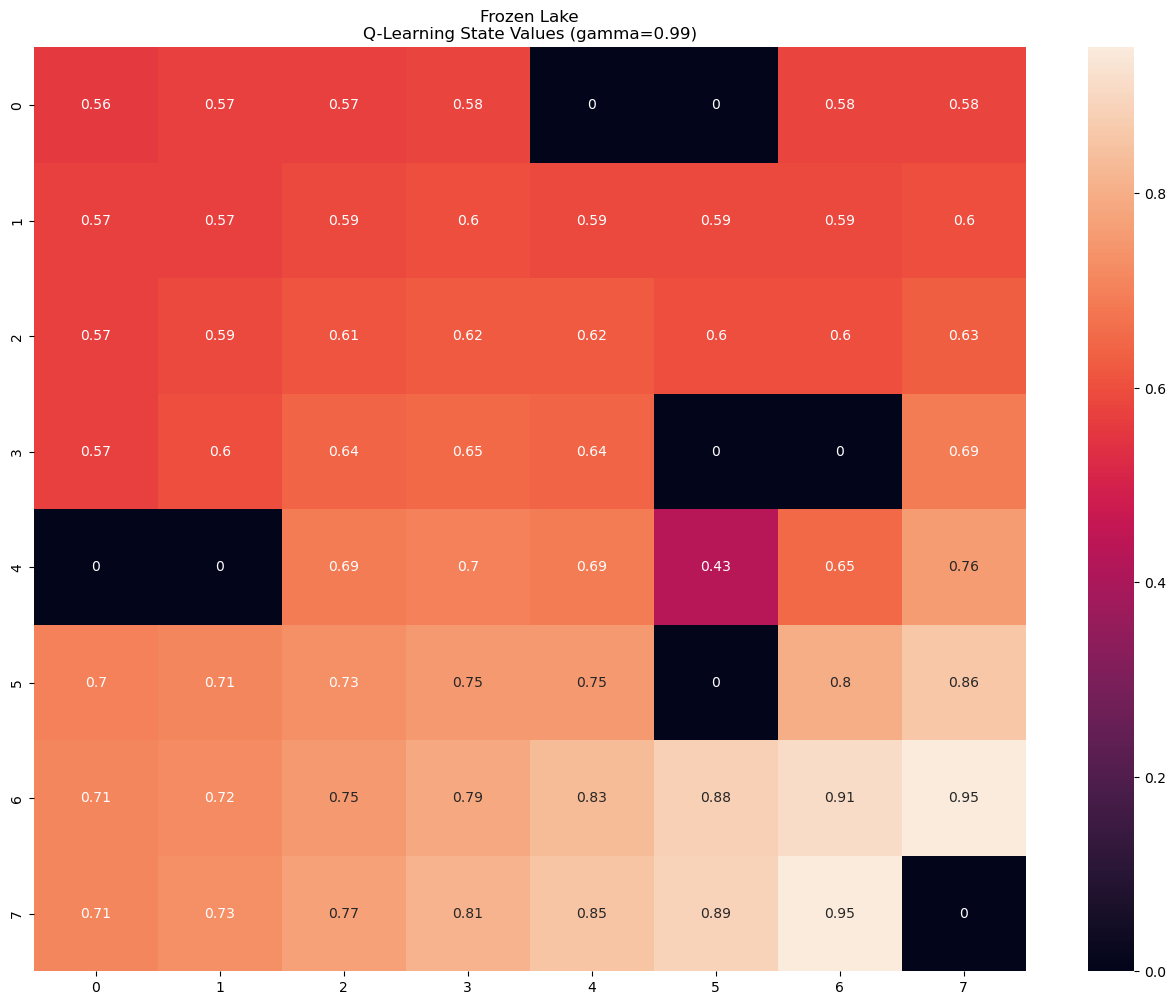

In [3]:
frozen_lake = gym.make('FrozenLake-v1', desc=grid_size, is_slippery=True)
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None, is_slippery=False)
frozen_lake._max_episode_steps = 200
gammas = [0.9, 0.95, 0.99]

Q = {}
V = {}
pi = {}
Q_track = {}
pi_track = {}
Q['gamma'] = {}
V['gamma'] = {}
pi['gamma'] = {}
Q_track['gamma'] = {}
pi_track['gamma'] = {}

for gamma in gammas:
    Q_tmp, V_tmp, pi_tmp, Q_track_tmp, pi_track_tmp = RL(frozen_lake).q_learning(gamma=gamma, epsilon_decay_ratio=0.25, n_episodes=100000)
    Q['gamma'][gamma] = Q_tmp
    V['gamma'][gamma] = V_tmp
    pi['gamma'][gamma] = pi_tmp
    Q_track['gamma'][gamma] = Q_track_tmp
    pi_track['gamma'][gamma] = pi_track_tmp
    
#plot state values
size = (8, 8)
for gamma in gammas:
    plt.figure(figsize=(16, 12))
    Plots.values_heat_map(V['gamma'][gamma], f"Frozen Lake\nQ-Learning State Values (gamma={gamma})", size)

  2%|▏         | 2422/100000 [00:01<00:41, 2367.48it/s]/home/zsang/miniconda3/envs/cs7641/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 64.04 seconds


runtime = 60.68 seconds


runtime = 58.40 seconds


runtime = 57.89 seconds


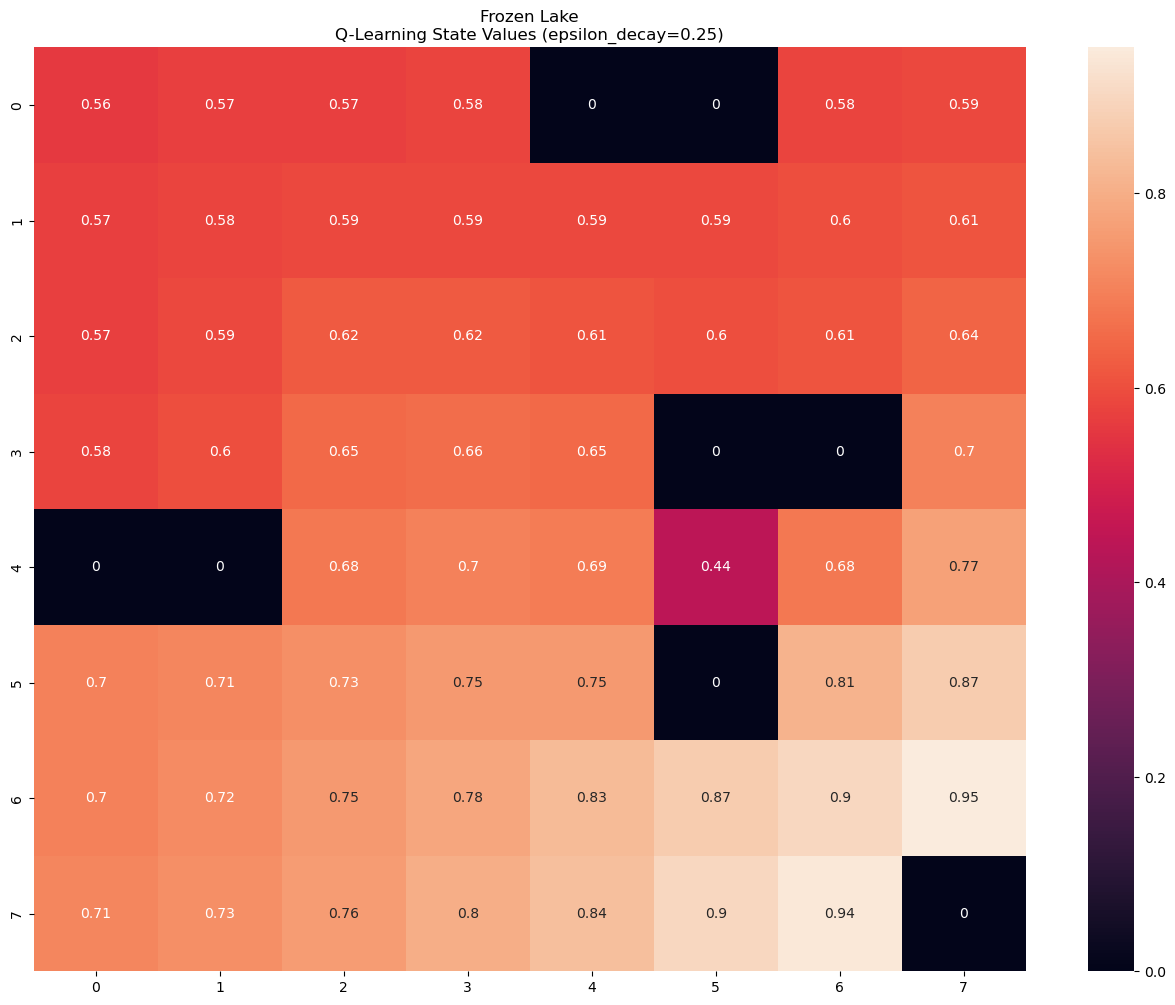

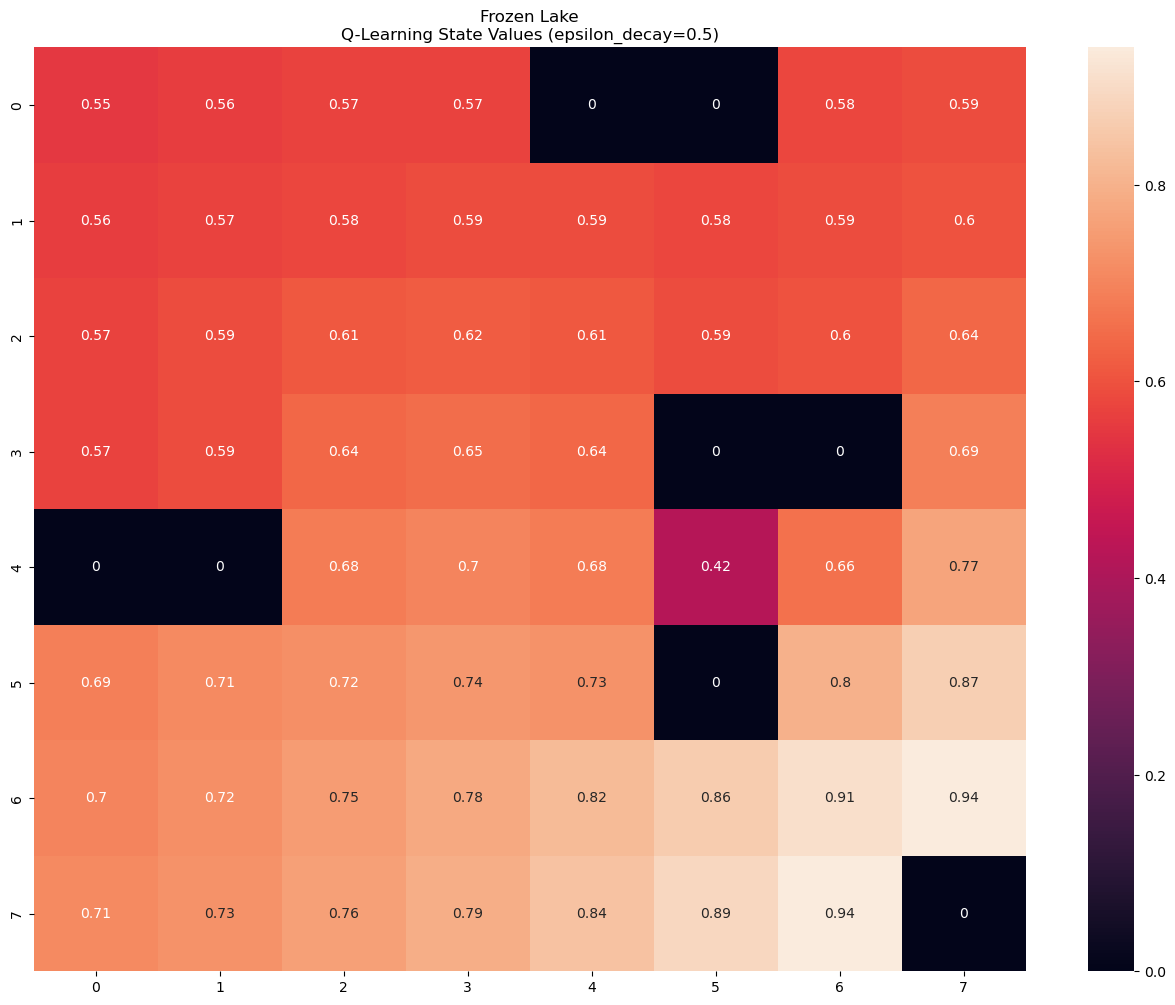

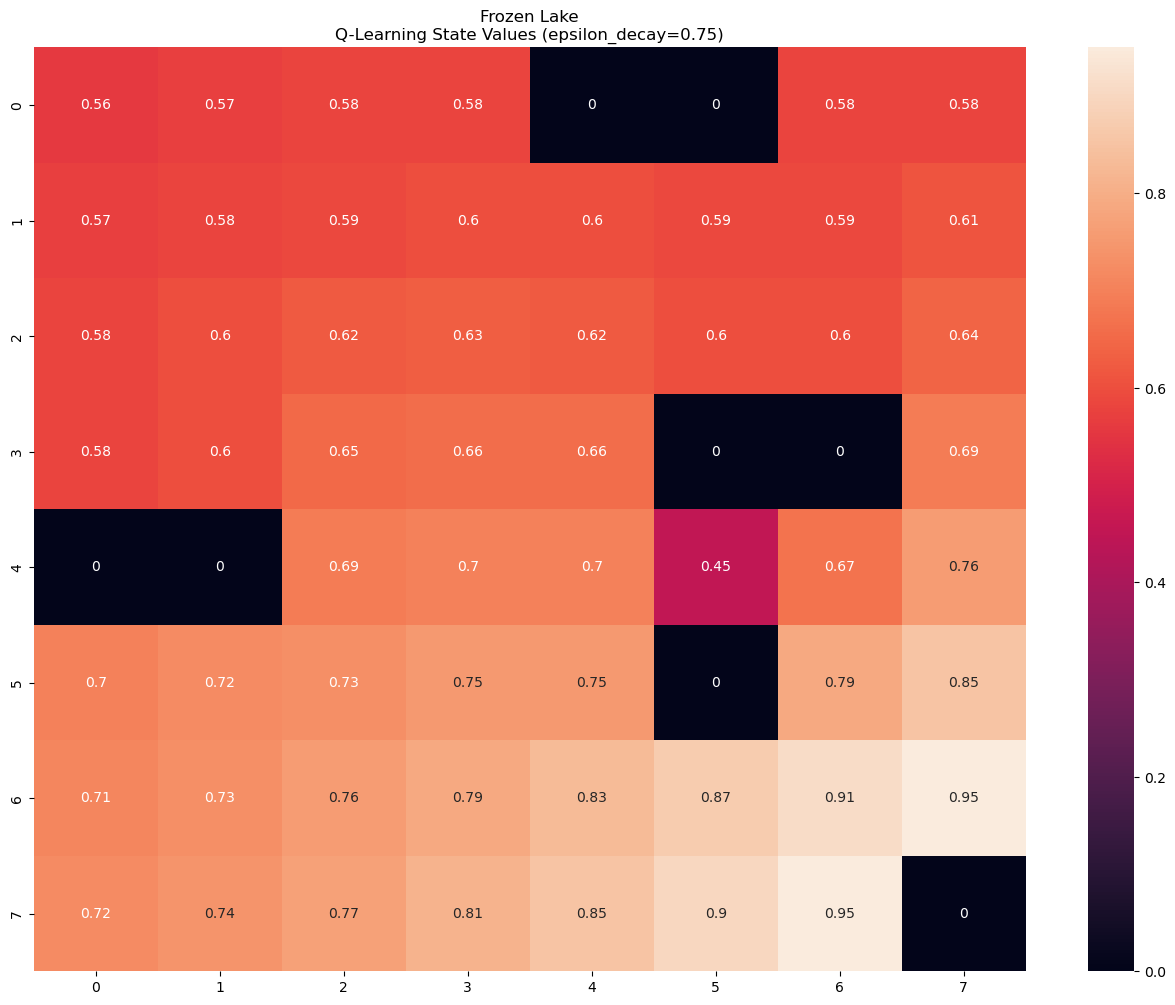

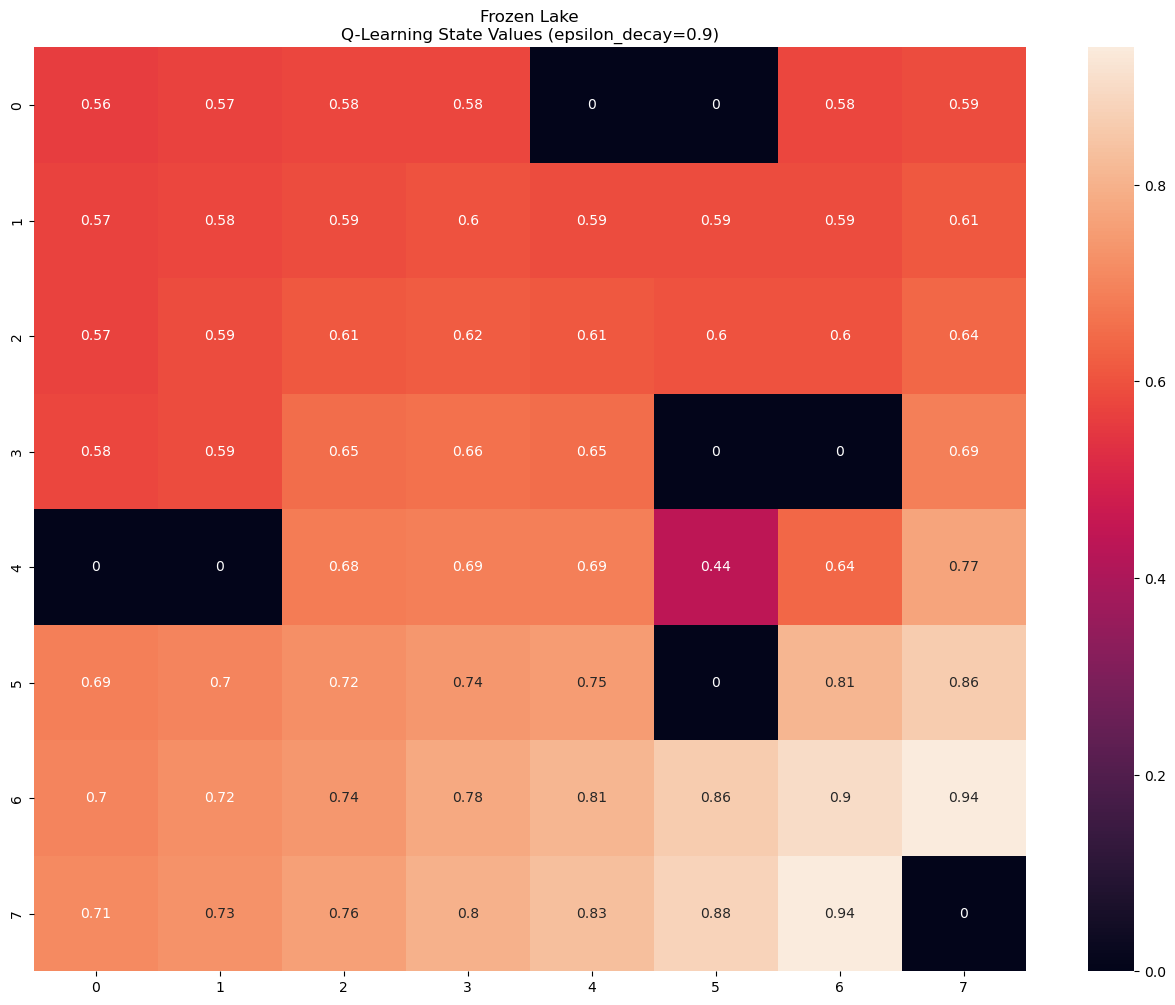

In [4]:
frozen_lake = gym.make('FrozenLake-v1', desc=grid_size, is_slippery=True)
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None, is_slippery=False)
frozen_lake._max_episode_steps = 200
epsilon_decays = [0.25, 0.5, 0.75, 0.9]

Q['epsilon'] = {}
V['epsilon'] = {}
pi['epsilon'] = {}
Q_track['epsilon'] = {}
pi_track['epsilon'] = {}


for epsilon_decay in epsilon_decays:
    Q_tmp, V_tmp, pi_tmp, Q_track_tmp, pi_track_tmp = RL(frozen_lake).q_learning(gamma=0.99, epsilon_decay_ratio=epsilon_decay, n_episodes=100000)
    Q['epsilon'][epsilon_decay] = Q_tmp
    V['epsilon'][epsilon_decay] = V_tmp
    pi['epsilon'][epsilon_decay] = pi_tmp
    Q_track['epsilon'][epsilon_decay] = Q_track_tmp
    pi_track['epsilon'][epsilon_decay] = pi_track_tmp
    
#plot state values
size = (8, 8)
for epsilon_decay in epsilon_decays:
    plt.figure(figsize=(16, 12))
    Plots.values_heat_map(V['epsilon'][epsilon_decay], f"Frozen Lake\nQ-Learning State Values (epsilon_decay={epsilon_decay})", size)

(99999,)


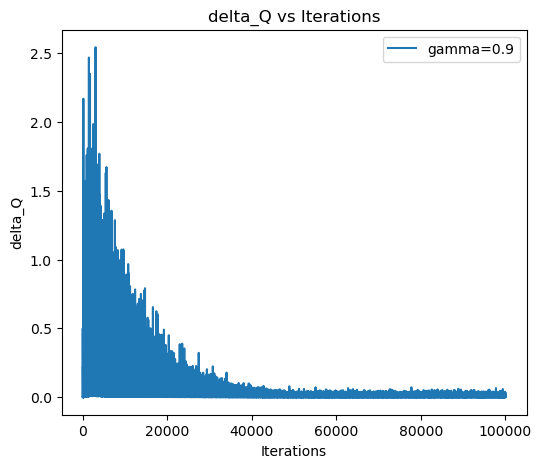

(99999,)


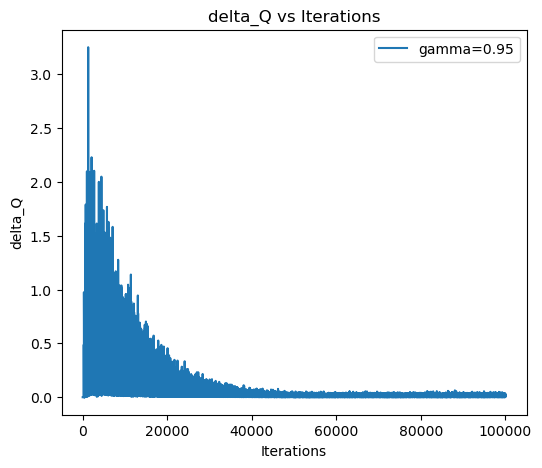

(99999,)


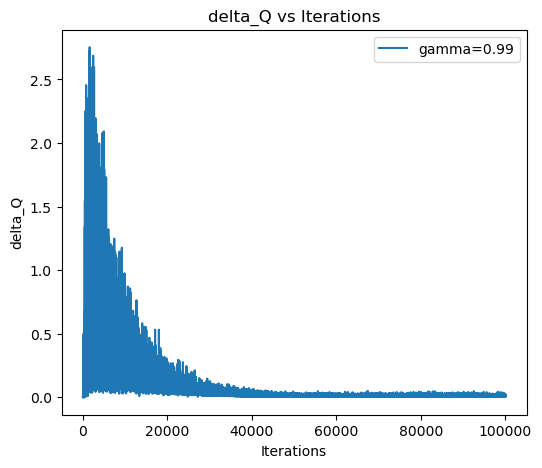

In [5]:
# Example Q-matrix (replace this with your actual Q-matrix)
# Reshape Q to have two dimensions (N, 4)
for gamma in gammas:
    Q_track_copy = Q_track['gamma'][gamma].copy()
    Q_track_reshaped = Q_track_copy.reshape(Q_track_copy.shape[0], Q_track_copy.shape[1] * Q_track_copy.shape[2])

    # Calculate differences between consecutive rows
    delta_Q = np.diff(Q_track_reshaped, axis=0)
    # delta_Q = delta_Q[::1000]
    # Sum absolute differences
    delta_Q = np.sum(np.abs(delta_Q), axis=1)
    print(delta_Q.shape)
    plt.figure(figsize=(6, 5))
    plt.plot(delta_Q, label=f"gamma={gamma}")
    plt.xlabel("Iterations")
    plt.ylabel("delta_Q")
    plt.title(f"delta_Q vs Iterations")
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


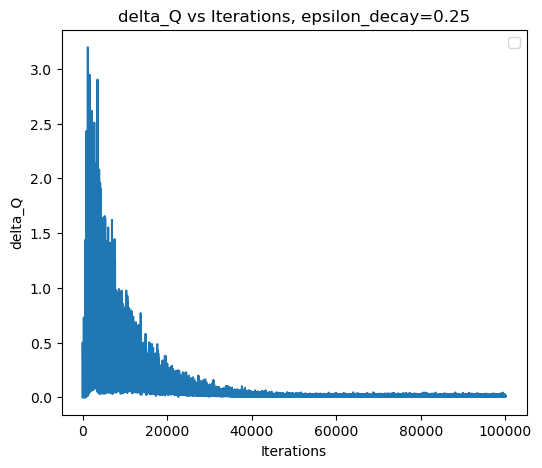

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


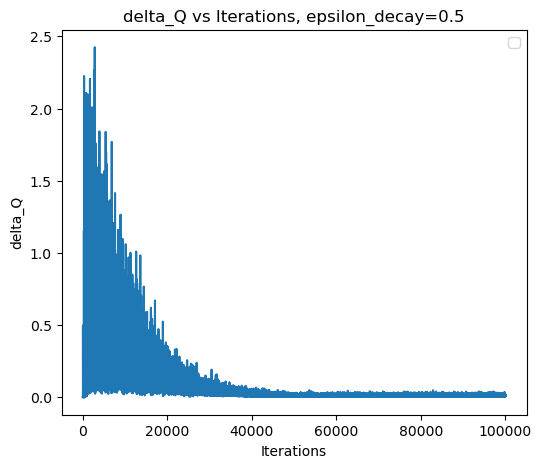

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


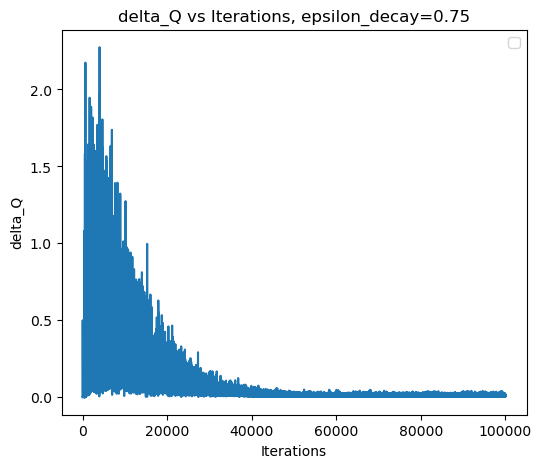

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


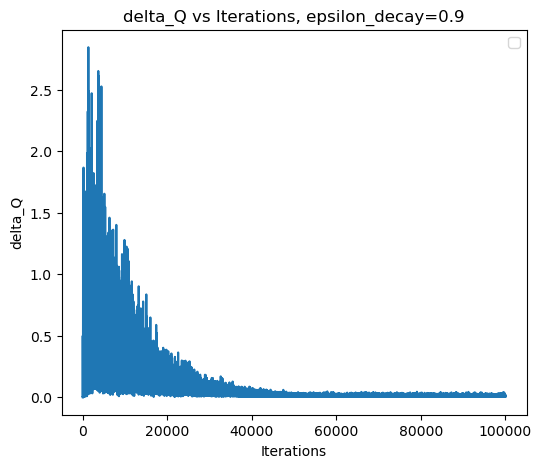

In [6]:
for epsilon_decay in epsilon_decays:
    Q_track_copy = Q_track['epsilon'][epsilon_decay].copy()
    Q_track_reshaped = Q_track_copy.reshape(Q_track_copy.shape[0], Q_track_copy.shape[1] * Q_track_copy.shape[2])

    # Calculate differences between consecutive rows
    delta_Q = np.diff(Q_track_reshaped, axis=0)
    
    # Sum absolute differences
    delta_Q = np.sum(np.abs(delta_Q), axis=1)
    print(delta_Q.shape)
    plt.figure(figsize=(6, 5))
    plt.plot(delta_Q)
    plt.xlabel("Iterations")
    plt.ylabel("delta_Q")
    plt.title(f"delta_Q vs Iterations, epsilon_decay={epsilon_decay}")
    plt.legend()
    plt.show()

In [ ]:
print(pi_track[0.9][1000])

Time Elapsed: 2.6841890811920166 seconds


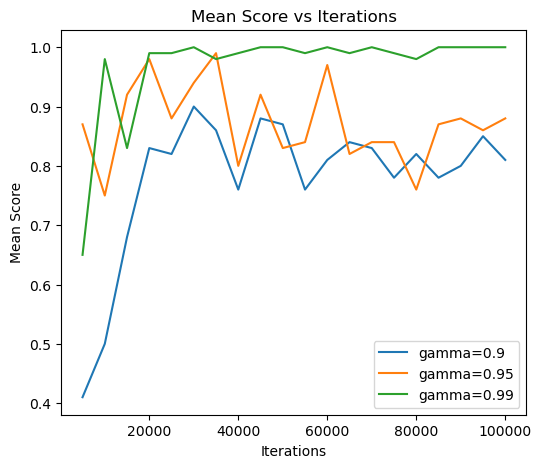

In [7]:
test_env = TestEnv()
reward_vi = {}
gammas = [0.9, 0.95, 0.99]
plot_range = range(4999, 100000, 5000)
start_time = time()
for gamma in gammas:
    reward_vi[gamma] = []
    for n in plot_range:
        reward_tmp = test_env.test_env(frozen_lake, render=False, pi=pi_track['gamma'][gamma][n], n_iters=100)
        reward_vi[gamma].append(np.mean(reward_tmp))
        clear_output(wait=True)
end_time = time()
time_elapsed = end_time - start_time
print(f"Time Elapsed: {time_elapsed} seconds")

plt.figure(figsize=(6, 5))
for key, value in reward_vi.items():
    plt.plot(plot_range, reward_vi[key], label=f"gamma={key}")
plt.xlabel("Iterations")
plt.ylabel("Mean Score")
plt.title("Mean Score vs Iterations")
plt.legend()
plt.show()

Time Elapsed: 3.8933544158935547 seconds


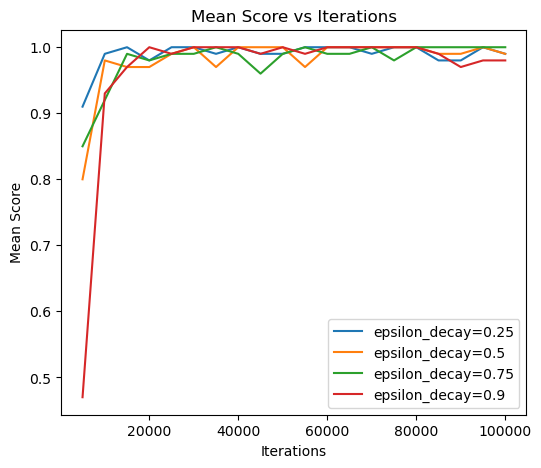

In [8]:
test_env = TestEnv()
reward_vi_epsilon = {}
epsilon_decays = [0.25, 0.5, 0.75, 0.9]
plot_range = range(4999, 100000, 5000)
start_time = time()
for epsilon_decay in epsilon_decays:
    reward_vi_epsilon[epsilon_decay] = []
    for n in plot_range:
        reward_tmp = test_env.test_env(frozen_lake, render=False, pi=pi_track['epsilon'][epsilon_decay][n], n_iters=100)
        reward_vi_epsilon[epsilon_decay].append(np.mean(reward_tmp))
        clear_output(wait=True)
end_time = time()
time_elapsed = end_time - start_time
print(f"Time Elapsed: {time_elapsed} seconds")

plt.figure(figsize=(6, 5))
for key, value in reward_vi_epsilon.items():
    plt.plot(plot_range, reward_vi_epsilon[key], label=f"epsilon_decay={key}")
plt.xlabel("Iterations")
plt.ylabel("Mean Score")
plt.title("Mean Score vs Iterations")
plt.legend()
plt.show()

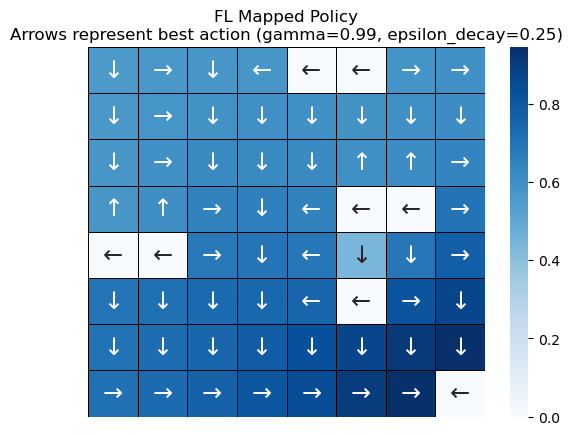

In [9]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size = (frozen_lake.nrow, frozen_lake.ncol)
gamma = 0.99
epsilon_decay = 0.25
val_max, policy_map = Plots.get_policy_map(pi['epsilon'][epsilon_decay], V['epsilon'][epsilon_decay], fl_actions, fl_map_size)
title = f"FL Mapped Policy\nArrows represent best action (gamma={gamma}, epsilon_decay={epsilon_decay})"
Plots.plot_policy(val_max, policy_map, fl_map_size, title)
plt.show()